<center><font size = 8><b>Digital Image Processing</b></font></center><br/><br/>
<center><font size = 6><b>Assignment 1</b></font></center>

### Name: Omar Nader Ahmed Gamal El Din
### ID: 2001714
### Email: omar2002184@gmail.com

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Histogram Equalization

Histogram equalization is the process used to transfer the gray levels so that the histogram of the resulting image is equalized to be a constant (theoretically).
<font size="5"><p style="text-align: center;">$s_{k} = T(r_{k}) = \frac{L-1}{MN}\sum \limits _{j=1} ^{k}n_{j}$</p></font><br/>
<font size="3">where:<br/>s: is the output intensity<br/> k: is the intensity level contour = $ 0, 1, 2,....., L - 1$<br/>  L: total number of intensity levels<br/>  $n_{j}$: histogram result at intensity j (pixels number of intensity j)<br/>$MN$: is the image size</font><br/><br/>
<font size="3">*In this section, you will apply histogram equalization algorithm on a low-contrast image.*</font>

Text(0.5, 1.0, 'Input Image')

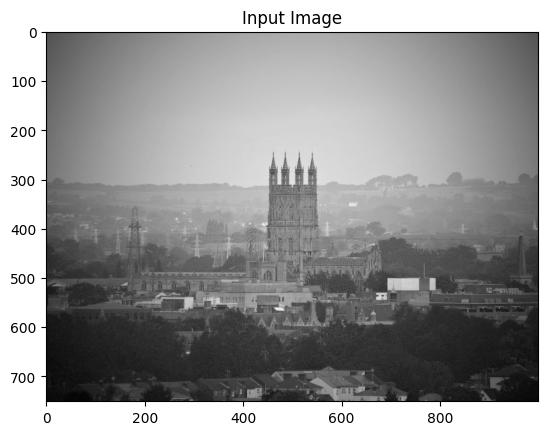

In [2]:
# Read the low_contrast image
low_contrast = cv2.imread("low_contrast_image.jpg", cv2.IMREAD_GRAYSCALE)

# TODO: Display the low contrast image using plt. Note that it is a grayscale image
plt.imshow(low_contrast, cmap="gray")
plt.title("Input Image")

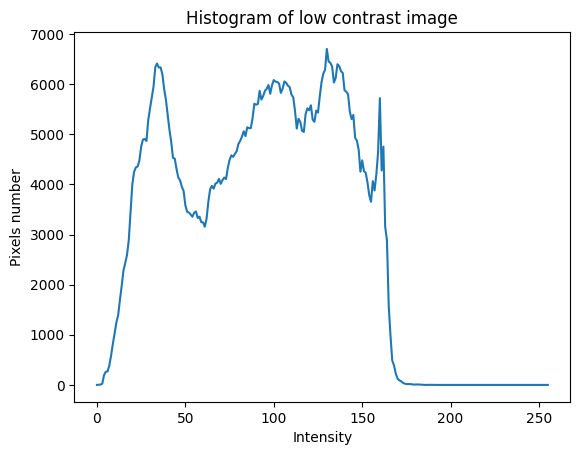

In [3]:
# TODO: Find the histogram of the image
low_contrast_histogram = cv2.calcHist(images=[low_contrast], channels=[0], mask=None, histSize=[256], ranges=[0,256])

# TODO: Plot the histogram with x-label: Intensity, y-label: Pixels number, title: Histogram of low contrast image

plt.plot(low_contrast_histogram)
plt.xlabel("Intensity")
plt.ylabel("Pixels number")
plt.title("Histogram of low contrast image")
plt.show()

In [4]:
print(low_contrast_histogram.shape)

# Convert the histogram array to 1D
h = low_contrast_histogram.ravel()
print(h.shape)
# Create a copy of the original image
equalized_image = np.copy(low_contrast)
print(equalized_image.shape)
# Initialize sum, L, M, N
sum = 0
L = h.shape[0]
M, N = low_contrast.shape

# Create an empty vector to hold the transformation function points
T = np.zeros((256, 1), np.uint8)

(256, 1)
(256,)
(751, 1000)


In [5]:
# TODO: Loop over 1D array of histogram to calculate s value of each k
for r in range(L):
# 1. Modify the sum 
    sum += h[r]
# 2. Compute s value
# 3. Round s to the nearest integer
    s = round(sum / (M *N) * (L-1))
# 4. Replace r intensities in the original image with the computed s intensity
# 5. Add a point (r,s) to the T vector
    T[r] = s
equalized_image = T[low_contrast] 

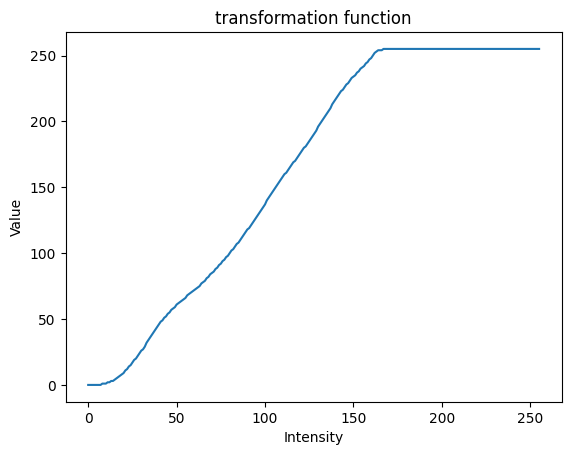

In [6]:
# TODO: Plot the transformation function
plt.plot(T)
plt.xlabel("Intensity")
plt.ylabel("Value")
plt.title("transformation function")
plt.show()

Text(0.5, 1.0, 'Histogram equalized using OpenCV function')

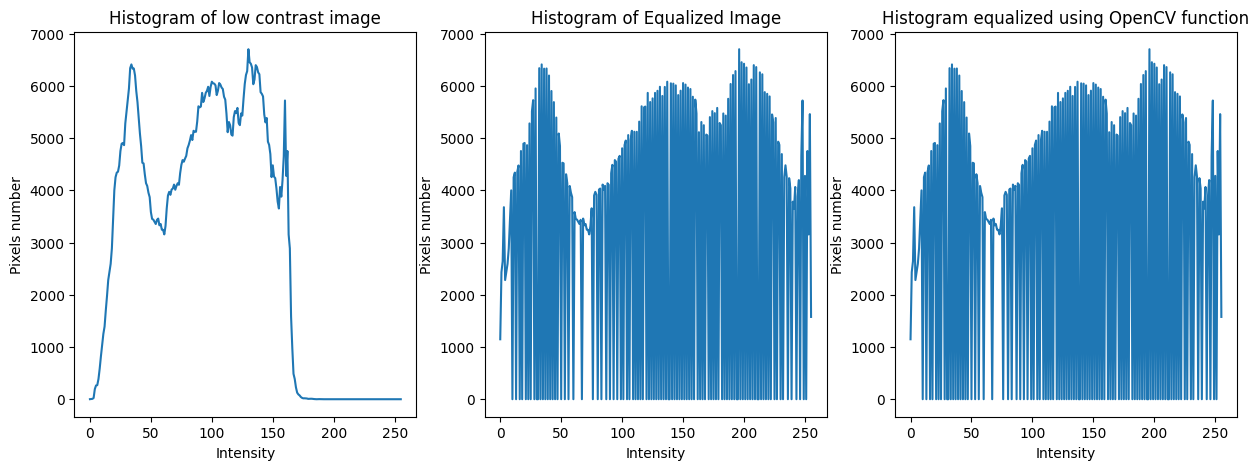

In [7]:
# TODO: Plot the histogram after equalization
# Use x-label: Intensity, y-label: Pixels number, title: Histogram of equalized image
equalized_histogram = cv2.calcHist(images=[equalized_image], channels=[0], mask=None, histSize=[256], ranges=[0,256])

cvEqualized = cv2.equalizeHist(low_contrast)
cvEqualized_histogram = cv2.calcHist(images=[cvEqualized], channels=[0], mask=None, histSize=[256], ranges=[0,256])

plt.subplots(1,3,figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(low_contrast_histogram)
plt.xlabel("Intensity")
plt.ylabel("Pixels number")
plt.title("Histogram of low contrast image")



plt.subplot(1,3,2)
plt.plot(equalized_histogram)
plt.xlabel("Intensity")
plt.ylabel("Pixels number")
plt.title("Histogram of Equalized Image")

plt.subplot(1,3,3)
plt.plot(cvEqualized_histogram)
plt.xlabel("Intensity")
plt.ylabel("Pixels number")
plt.title("Histogram equalized using OpenCV function")

Text(0.5, 1.0, 'Using OpenCV function Image')

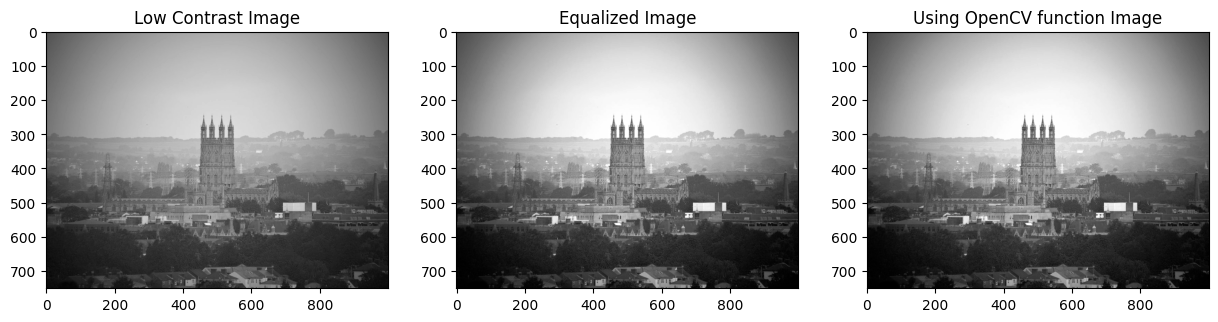

In [8]:
# TODO: Display the low contrast and the new equalized images using plt
plt.subplots(1,3,figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(low_contrast, cmap='gray')
plt.title('Low Contrast Image')

plt.subplot(1,3,2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')


plt.subplot(1,3,3)
plt.imshow(cvEqualized, cmap='gray')
plt.title('Using OpenCV function Image')

# 2. Medical Imaging

Image processing has become a cornerstone in the medical field improving the way healthcare professionals diagnose and treat patients. By leveraging advanced algorithms and imaging techniques, medical image processing allows for detailed, non-invasive exploration exploration of the human body.<br/><br/>
One of the key benefits of medical image processing is its ability to enhance the clarity and detail of medical images.<br/>In this section, you will apply some image enhancement techniques to improve the quality of a medical image.

Text(0.5, 1.0, 'Input Image')

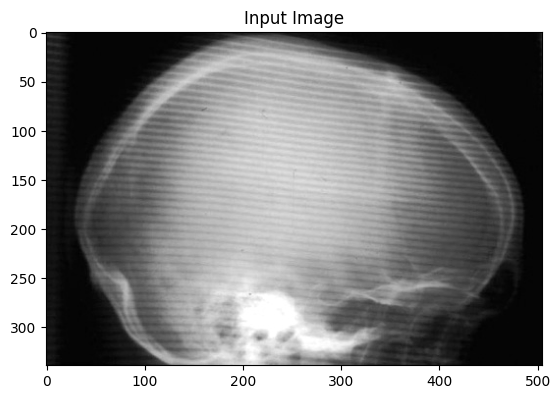

In [9]:
# Read the medical image
medical_image = cv2.imread("medical.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(medical_image, cmap= "grey")
plt.title("Input Image")
# TODO: Create a pipeline to enhance the quality of the medical image
#       Support your answer with various useful plots

#first there is periodic noise that it is better to remove in frequency domain

In [10]:
# Apply DFT on the image then shift the origin to the center of the image
def DFT(image):
    fft_image = cv2.dft(src=np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    shifted_fft = np.fft.fftshift(fft_image)
    return shifted_fft
medical_shifted_fft = DFT(medical_image)
print (medical_shifted_fft.shape)

(339, 505, 2)


Text(0.5, 1.0, 'DFT')

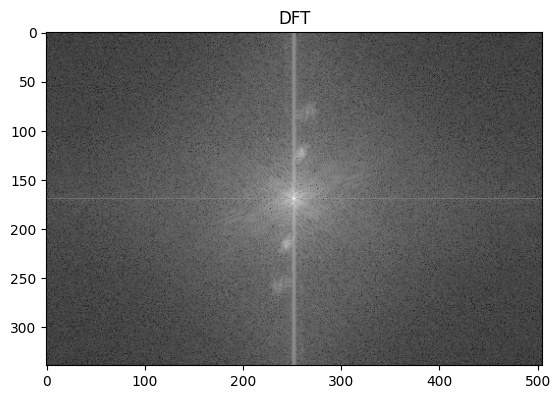

In [11]:
def display_DFT(shifted_fft):
    # Convert to log scale
    magnitude_spectrum = np.log(1 + cv2.magnitude(medical_shifted_fft[:, :, 0], medical_shifted_fft[:, :, 1]))
    # Normalize the image to range from 0 to 255 before displaying it
    normalized_magnitude = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return normalized_magnitude
medical_normalized_dft = display_DFT(medical_shifted_fft)
plt.imshow(medical_normalized_dft, cmap="gray")
plt.title("DFT")

(339, 505, 2)


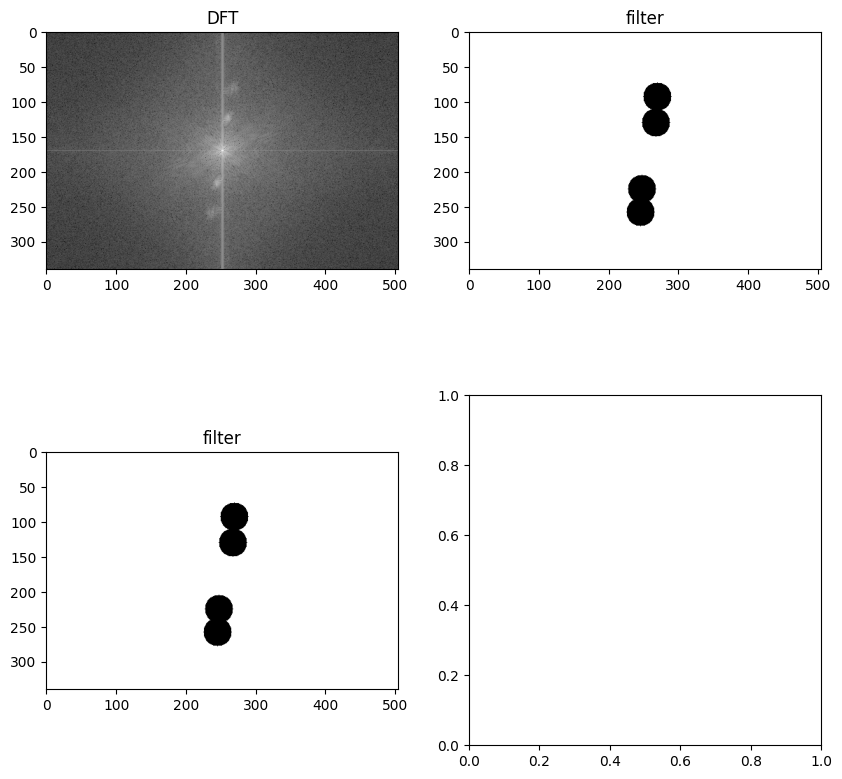

In [12]:
# Create a mask with the same dimensions as the image
rows = medical_shifted_fft.shape[0]
cols = medical_shifted_fft.shape[1]
crow, ccol = rows // 2, cols // 2


mask = np.ones(shape=medical_shifted_fft.shape, dtype=np.uint8)
print(mask.shape)

circle_radius = 20

cv2.circle(mask, (ccol + 15, crow - 40), circle_radius, (0, 0), -1) 
cv2.circle(mask, (ccol - 5, crow + 55), circle_radius, (0, 0), -1)  
cv2.circle(mask, (ccol - 7, crow + 88), circle_radius, (0, 0), -1)  
cv2.circle(mask, (ccol + 17, crow - 77), circle_radius, (0, 0), -1)  


medical_masked = medical_shifted_fft * mask

plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(medical_normalized_dft, cmap="gray")
plt.title("DFT")
plt.subplot(2,2,2)
plt.imshow(mask[:,:,0] * 255, cmap="gray")
plt.title("filter")
plt.subplot(2,2,3)
plt.imshow(mask[:,:,0] * 255, cmap="gray")
plt.title("filter")
plt.show()

### I have plotted the filter twice to compare the circles locations 

Text(0.5, 1.0, 'After Removing Periodic Noise Image')

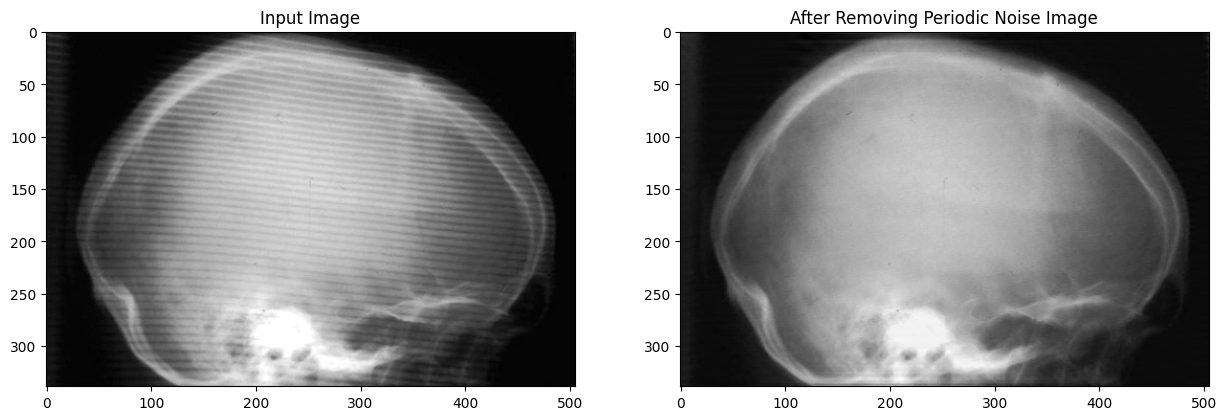

In [13]:
def IDFT(shifted_fft):
    # Get the image back using inverse DFT
    unshifted_ifft = np.fft.ifftshift(shifted_fft)
    idft_image = cv2.idft(src=unshifted_ifft)
    restored_image = cv2.magnitude(idft_image[:, :, 0], idft_image[:, :, 1])
    # Normalize the image to range from 0 to 255 before displaying it
    restored_image = cv2.normalize(restored_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return restored_image


plt.subplots(1,2,figsize=(15,15))
result1_image = IDFT(medical_masked)

plt.subplot(1,2,1)
plt.imshow(medical_image, cmap="gray")
plt.title("Input Image")

plt.subplot(1,2,2)
plt.imshow(result1_image, cmap="gray")
plt.title("After Removing Periodic Noise Image")

Text(0.5, 1.0, 'After Sharpening')

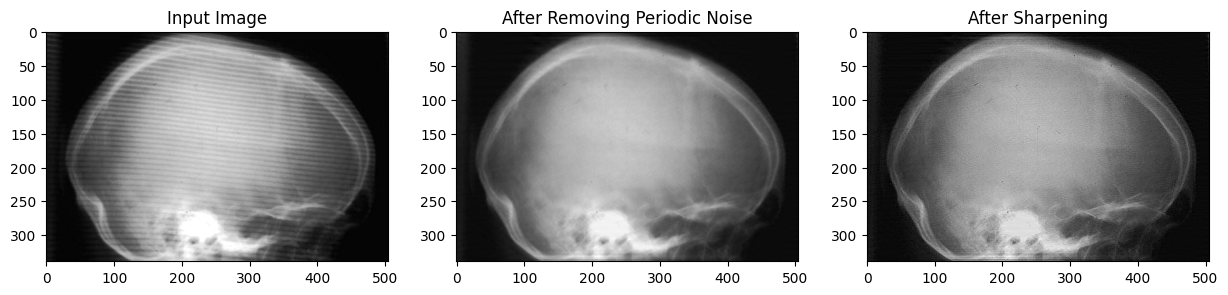

In [14]:
laplacian_image = cv2.Laplacian(src=result1_image, ksize= 1, ddepth=cv2.CV_64F) # default ksize=1 apply the 3x3 laplacian filter
laplacian_image_abs = np.absolute(laplacian_image)
laplacian_image_abs = cv2.normalize(laplacian_image_abs, None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_8U)

sharpened_image = np.absolute(result1_image - laplacian_image)
sharpened_image = cv2.normalize(sharpened_image, None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_8U)


plt.subplots(1,3,figsize = (15,15))

plt.subplot(1,3,1)
plt.imshow(medical_image, cmap="gray")
plt.title("Input Image")

plt.subplot(1,3,2)
plt.imshow(result1_image, cmap="gray")
plt.title("After Removing Periodic Noise")

plt.subplot(1,3,3)
plt.imshow(sharpened_image, cmap="gray")
plt.title("After Sharpening")


Text(0.5, 1.0, 'Sharpened Image')

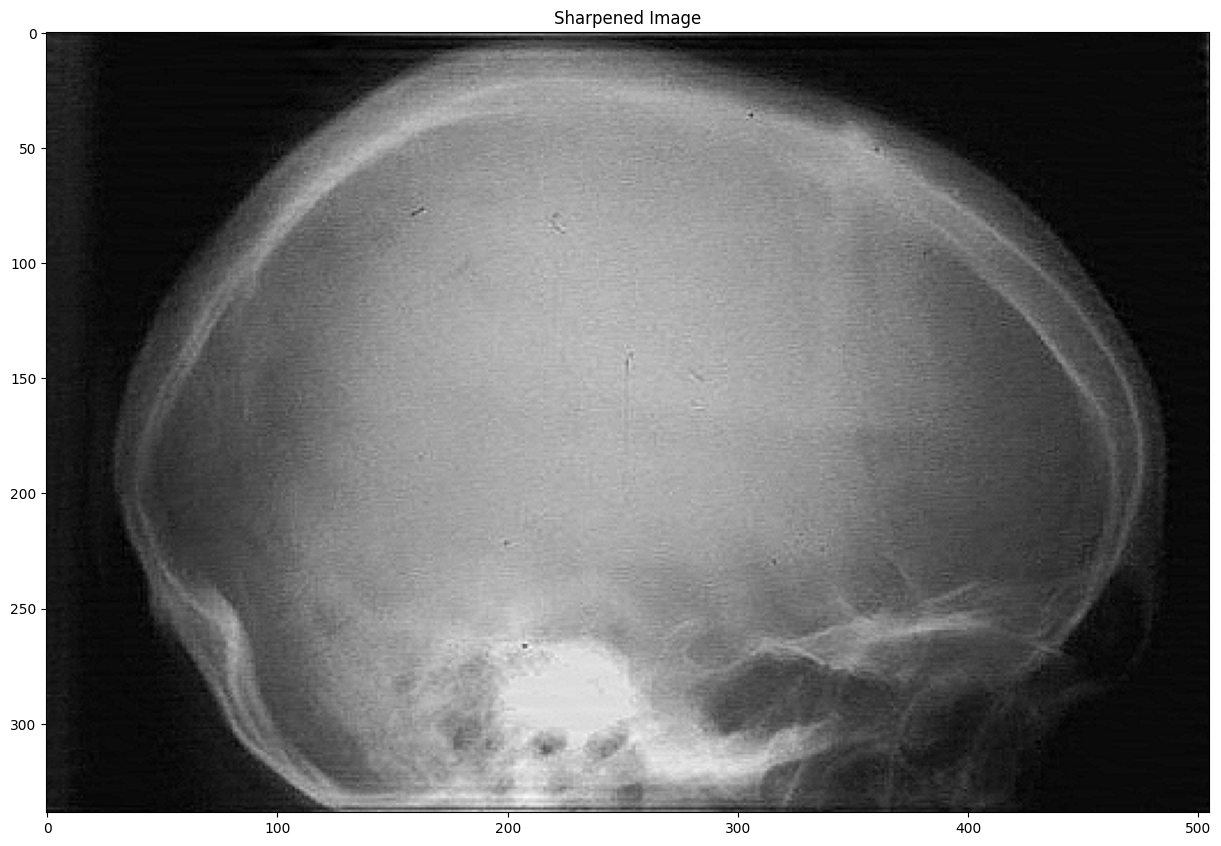

In [15]:
plt.subplots(1, 1, figsize=(15,15))
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened Image")

Text(0.5, 1.0, 'Sharpened Image')

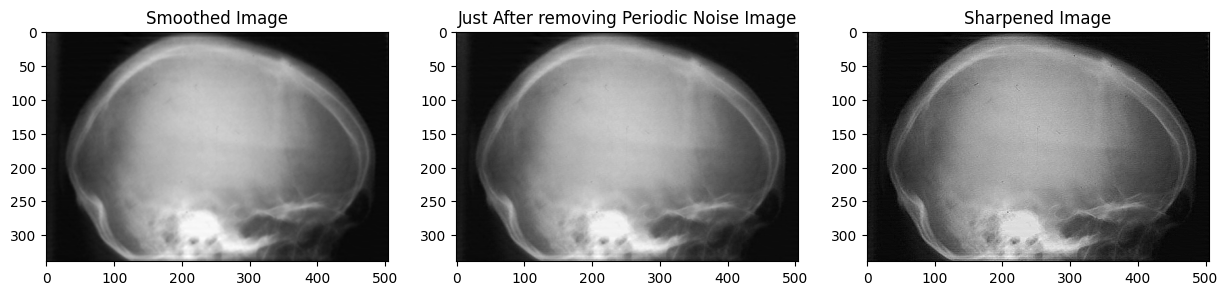

In [16]:
gaussian_image = cv2.GaussianBlur(src=result1_image, ksize=(3,3), sigmaX=0)  # sigmaY=sigmaX

laplacian_image = cv2.Laplacian(src=gaussian_image, ksize= 1, ddepth=cv2.CV_64F) # default ksize=1 apply the 3x3 laplacian filter
laplacian_image_abs = np.absolute(laplacian_image)
laplacian_image_abs = cv2.normalize(laplacian_image_abs, None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_8U)

sharpened_image1 = np.absolute(gaussian_image - laplacian_image)
sharpened_image1 = cv2.normalize(sharpened_image1, None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.subplots(1, 3, figsize=(15, 15))
plt.subplot(1,3,1)
plt.imshow(gaussian_image, cmap="gray")
plt.title("Smoothed Image")
plt.subplot(1,3,2)
plt.imshow(result1_image, cmap="gray")
plt.title("Just After removing Periodic Noise Image")
plt.subplot(1,3,3)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened Image")


### Comparing between directly sharpened and sharpened after smoothing

Text(0.5, 1.0, 'Sharpening After Smoothing Image')

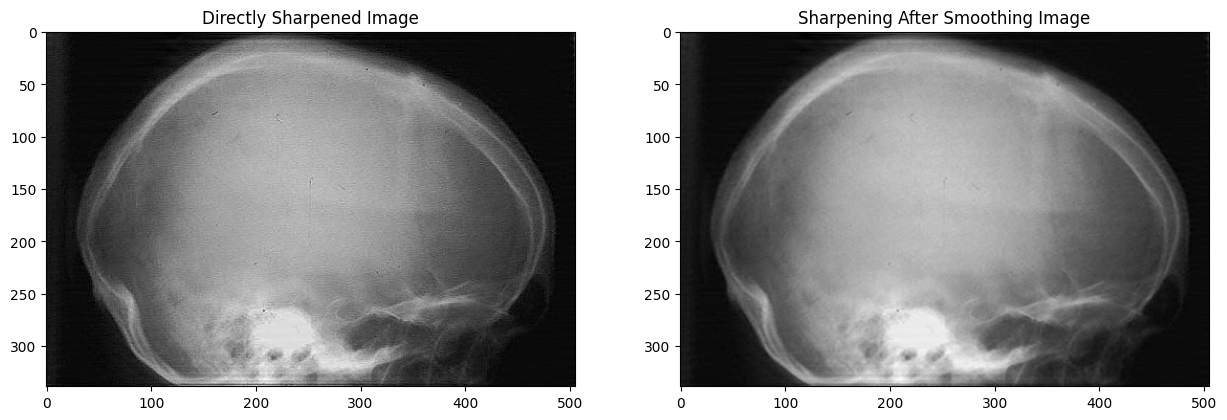

In [17]:
plt.subplots(1,2,figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Directly Sharpened Image")

plt.subplot(1,2,2)
plt.imshow(sharpened_image1, cmap="gray")
plt.title("Sharpening After Smoothing Image")

Text(0.5, 1.0, 'Final Result')

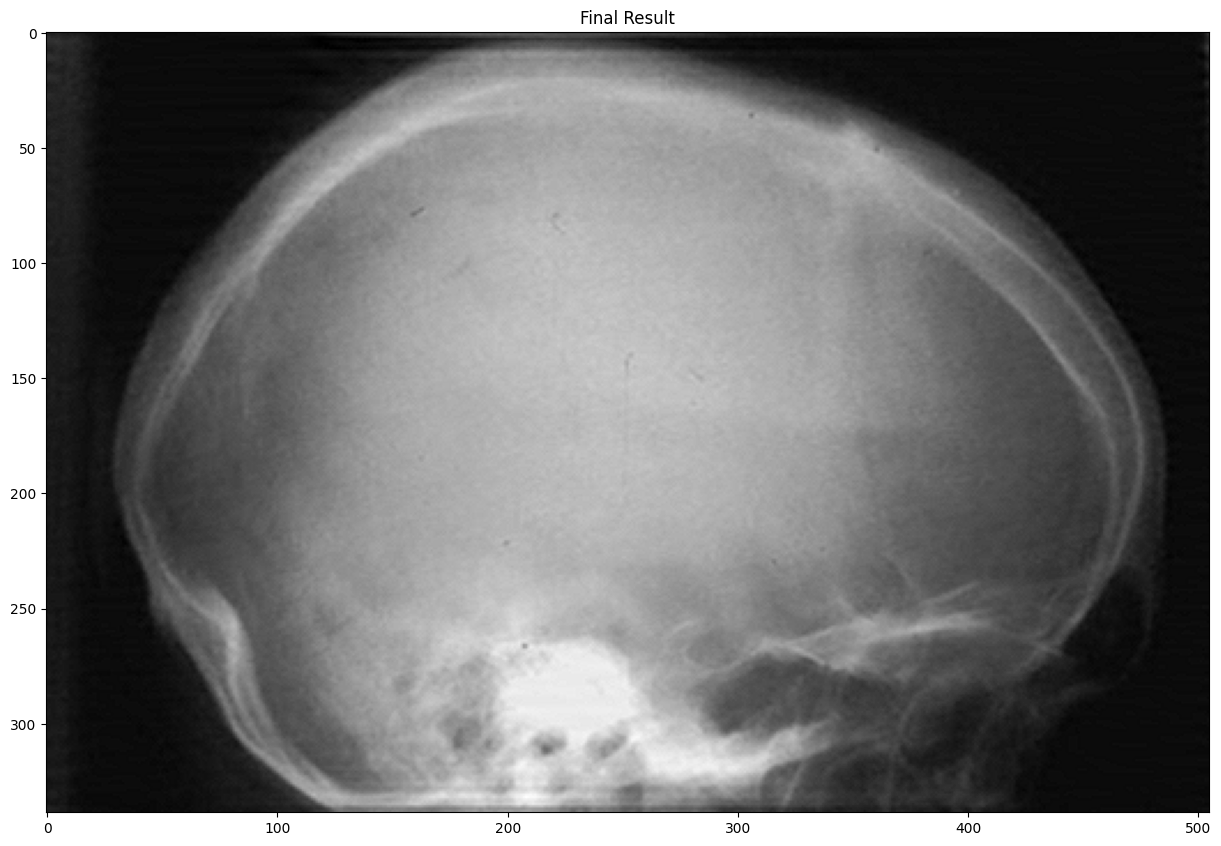

In [18]:
plt.subplots(1,1,figsize=(15,15))

plt.imshow(sharpened_image1, cmap="gray")
plt.title("Final Result")

### Steps of Design
1. Firstly I have noticed periodic noise in spatial domain which means its easy to remove them from frequency domain
2. After searching I knew that these spots in frequency domain are the periodic noise in spatial domain so by try and error I have reached that filter to remove them
3. I tried sharpening after that but I thought it was too sharp so I smoothed then sharpened and compared the results and chose the one that was smoothed then sharpened as the final result

<br> I have tried equalization too but it brought too bad results